In [15]:
!pwd

/Users/yangliu/Desktop


In [16]:
!ls

dsi-sf-7-materials      ga-capstone
dsi-sf-7-materials-yang ga_new_cap


In [17]:
import os
import pandas as pd
import numpy as np
#from medpy.io import load
from matplotlib import pyplot as plt
import glob


%matplotlib inline

In [19]:
rootDir = "/Users/yangliu/Desktop/ga_new_cap/"
ls_file = []
for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if fileName.endswith('.jpeg'):
            ls_file.append(fileName)

In [20]:
len(ls_file)

10

In [21]:
ls_file[0]

'10_left.jpeg'

In [22]:
import scipy
import cv2
import matplotlib.image as mpimg

In [26]:
# img = cv2.imread(ls_file[0])
img1 = mpimg.imread('ga_new_cap/sample/' + ls_file[0])
img2 = mpimg.imread('ga_new_cap/sample/' + ls_file[2])

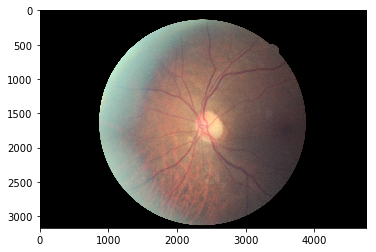

In [27]:
plt.imshow(img1)

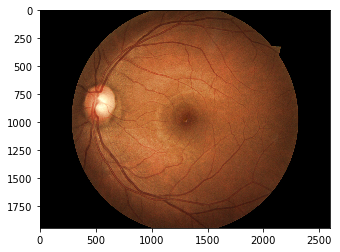

In [28]:
plt.imshow(img2)

In [29]:
img1.shape

(3168, 4752, 3)

In [30]:
img2.shape

(1944, 2592, 3)

In [121]:
def find_border_dynamic_threshold(image, axis):
    im_array = np.sum(np.sum(image, axis=axis), axis=1)
    threshold = im_array.max() /1000
    indices = np.where(im_array > threshold)
    return indices[0][0], indices[0][-1]

In [119]:
def crop_img(img):
# finding min max indices
    min_x, max_x = find_border_dynamic_threshold(img, 0)
    min_y, max_y = find_border_dynamic_threshold(img, 1)
# crop
    image = img[min_y:max_y, min_x:max_x]
    return image

In [ ]:
#crop different sizes

In [122]:
#reshape
def reshape_img(filename, dimension): 
    img = mpimg.imread('/Users/yangliu/Desktop/ga_new_cap/sample/' + filename)
    image = cv2.resize(crop_img(img),(dimension,dimension))
    return image

In [123]:
#create .data file for different sizes
def memap_arry(img_file,dimension): #create memmap object
    #begin = time.time()
    #print "Started:", char
    tmp_char_array = reshape_img(img_file, dimension)
    char_mmap = np.memmap(dtype='float64', filename= '/Users/yangliu/Desktop/ga_new_cap/' + str(dimension) + '_train/' + img_file.split('.')[0] +'.data', mode='w+', shape=tmp_char_array.shape)
    char_mmap[:, :] = tmp_char_array
    char_mmap_path = '/Users/yangliu/Desktop/ga_new_cap/'+ str(dimension) + '_train/' + img_file.split('.')[0] +'.data' #hard codes foler name

In [ ]:
#resize after crop

In [125]:
#create 3 directories 128,256,512
#start with 128
for i in ls_file:
    memap_arry(i, 128)

In [126]:
for i in ls_file:
    memap_arry(i, 256)

In [127]:
for i in ls_file:
    memap_arry(i, 512)

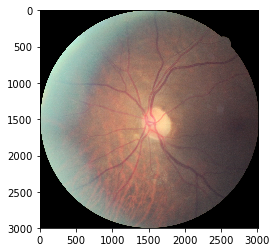

In [62]:
#plot after crop and resize
plt.imshow(image)

In [73]:
# rootDir = '/Users/yangliu/Desktop/ga_new_cap/sample/128_train'
# file_dict = {
#     'name':[],
#     'pic': []}
# for root, dirs, files in os.walk(rootDir):
#     for fileName in files:
#         if fileName.endswith('.data'):
#             file_dict['name'].append(fileName.split('.')[0])
#             file_dict['pic'].append(os.)

In [ ]:
#build model for different sizes

In [63]:
labels = pd.read_csv('/Users/yangliu/Desktop/ga_new_cap/trainLabels.csv')

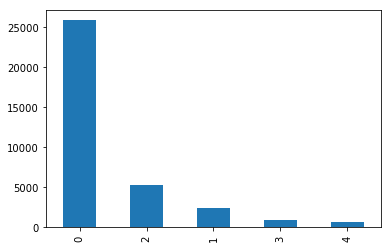

In [80]:
labels['level'].value_counts().plot(kind='bar')